In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET

CLINICAL_PATH = "../../datasets/clinical_data"
CLINICAL_JSON_PATH = '../../datasets/clinical_data(json&manifest)/files.2024-12-12.json'

 # Clinical data analysis
 
These XML files contain clinical data for breast cancer (BRCA) patients from the TCGA project. Each file represents a single patient and includes:

- Patient information (age, death, vital status).
- Tumor characteristics (histology, stage).
- Treatment details and follow-up data.

### Explore columns of clinical TXT files

In [3]:
import pickle

def import_txt(file_path):
    df = pd.read_csv(file_path, sep="\t")
    print(f"\nTXT file {file_path}. \nCOLUMNS: {df.columns}")
    columns_to_select = df.columns[df.columns.str.contains('age|year|days|case|time', case=False)]
    print(f"COLUMNS with 'age|year|days|case|time': {columns_to_select}")

def import_parce(file_path):
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    print(f"\nFile TXT PARCEL {file_path}: {data}")

count = 0
for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file == "logs":
            for f in os.listdir(f"{CLINICAL_PATH}/{subfolder}/{file}"):
                if f.endswith(".parcel"):
                    import_parce(f"{CLINICAL_PATH}/{subfolder}/{file}/{f}")
        elif file.endswith(".txt"):
            import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
            if file != "annotations.txt":
                count += 1
print(f"\nTotal TXT files (excluding annotations.txt): {count}")


TXT file ../../datasets/clinical_data/051ca785-e7be-4ac3-8757-1c9ace8acf7e/annotations.txt. 
COLUMNS: Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
       'classification', 'created_datetime', 'status', 'notes'],
      dtype='object')
COLUMNS with 'age|year|days|case|time': Index(['created_datetime'], dtype='object')

File TXT PARCEL ../../datasets/clinical_data/051ca785-e7be-4ac3-8757-1c9ace8acf7e/logs/nationwidechildrens.org_clinical.TCGA-A8-A08F.xml.parcel: IntervalTree([Interval(0, 84541, {'md5sum': 'f31cca8e42209358a8f3039ee72559bb'})])

TXT file ../../datasets/clinical_data/07488c2c-c50f-402e-8f22-9278db6110f9/annotations.txt. 
COLUMNS: Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
       'classification', 'created_datetime', 'status', 'notes'],
      dtype='object')
COLUMNS with 'age|year|days|case|time': Index(['created_datetime'], dtype='object')

File TXT PARCEL ../../datasets/clinical_data/07488c2c-c50f-402e-8f22-9278db6110f9/lo

**Structures of files discarded for our analysis:**
- Annotations TXT files. 
    - COLUMNS: `Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
           'classification', 'created_datetime', 'status', 'notes'],
          dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
           'classification', 'created_datetime', 'status', 'notes'],
          dtype='object')`
- org_clinical_omf_v4 TXT files. 
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_omf_barcode',
           'bcr_omf_uuid', 'form_completion_date', 'malignancy_type',
           'other_malignancy_dx_days_to', 'surgery_indicator',
           'other_malignancy_surgery_type', 'other_malignancy_surgery_days_to',
           'pharmaceutical_therapy_indicator', 'pharmaceutical_therapy_extent',
           'pharmaceutical_therapy_drug_name', 'pharmaceutical_tx_started_days_to',
           'radiation_therapy_indicator', 'radiation_therapy_extent',
           'history_rt_tx_to_site_of_tcga_tumor',
           'radiation_therapy_started_days_to', 'ajcc_staging_edition',
           'ajcc_tumor_pathologic_pt', 'ajcc_nodes_pathologic_pn',
           'ajcc_metastasis_pathologic_pm', 'ajcc_pathologic_tumor_stage',
           'clinical_stage', 'other_malignancy_anatomic_site',
           'other_malignancy_anatomic_site_text',
           'other_malignancy_histological_type',
           'other_malignancy_histological_type_text',
           'other_malignancy_laterality', 'stage_other'],
          dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['other_malignancy_dx_days_to', 'other_malignancy_surgery_days_to',
       'pharmaceutical_tx_started_days_to', 'radiation_therapy_started_days_to', 'ajcc_pathologic_tumor_stage',
       'clinical_stage', 'stage_other'],
      dtype='object')`
- org_clinical_follow_up_v* TXT files:
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_followup_barcode',
       'bcr_followup_uuid', 'form_completion_date',
       'radiation_treatment_adjuvant', 'pharmaceutical_tx_adjuvant',
       'tumor_status', 'vital_status', 'last_contact_days_to', 'death_days_to',
       'new_tumor_event_dx_indicator', 'new_tumor_event_type',
       'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'new_tumor_event_radiation_tx',
       'new_tumor_event_pharmaceutical_tx', 'new_tumor_event_surgery_days_to', 'nte_er_status',
       'nte_er_status_ihc__positive', 'nte_er_positivity_scale_used', 'nte_er_ihc_intensity_score', 'nte_pr_positivity_scale_used'
       'nte_er_positivity_other_scale', 'nte_er_positivity_define_method',
       'nte_pr_status_by_ihc', 'nte_pr_status_ihc__positive',
       'nte_pr_ihc_intensity_score', 'nte_pr_positivity_other_scale',
       'nte_pr_positivity_define_method', 'nte_her2_status',
       'nte_her2_status_ihc__positive', 'nte_her2_positivity_ihc_score',
       'nte_her2_positivity_other_scale', 'nte_her2_positivity_method',
       'nte_her2_fish_status', 'nte_her2_signal_number',
       'nte_cent_17_signal_number', 'her2_cent17_counted_cells_count',
       'nte_cent_17_her2_ratio', 'nte_cent17_her2_other_scale',
       'nte_her2_fish_define_method', 'cent17_copy_number',
       'days_to_additional_surgery_locoregional_procedure',
       'days_to_additional_surgery_metastatic_procedure',
       'days_to_last_known_alive', 'er_ihc_score', 'er_positivity_method',
       'er_positivity_scale_other', 'er_status_by_ihc',
       'er_status_ihc_Percent_Positive', 'her2_and_cent17_cells_count',
       'her2_and_cent17_scale_other', 'her2_cent17_ratio', 'her2_copy_number',
       'her2_fish_method', 'her2_fish_status', 'her2_ihc_percent_positive',
       'her2_ihc_score', 'her2_positivity_method_text',
       'her2_positivity_scale_other', 'her2_status_by_ihc',
       'new_tumor_event_surgery', 'new_tumor_event_surgery_met',
       'pr_positivity_define_method', 'pr_positivity_ihc_intensity_score',
       'pr_positivity_scale_other', 'pr_status_by_ihc',
       'pr_status_ihc_percent_positive', 'followup_reason'],
      dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['last_contact_days_to', 'death_days_to', 'new_tumor_event_dx_days_to',
       'days_to_additional_surgery_locoregional_procedure',
       'days_to_additional_surgery_metastatic_procedure',
       'days_to_last_known_alive'],
      dtype='object')`
- org_clinical_radiation_brca TXT files: 
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_radiation_barcode',
       'bcr_radiation_uuid', 'form_completion_date', 'radiation_therapy_type',
       'radiation_therapy_site', 'radiation_total_dose',
       'radiation_adjuvant_units', 'radiation_adjuvant_fractions_total',
       'radiation_therapy_started_days_to',
       'radiation_therapy_ongoing_indicator',
       'radiation_therapy_ended_days_to', 'treatment_best_response',
       'course_number', 'radiation_type_other', 'therapy_regimen',
       'therapy_regimen_other'],
      dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['radiation_therapy_started_days_to', 'radiation_therapy_ended_days_to'], dtype='object')`
- org_clinical_drug_brca TXT files:
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_drug_barcode',
       'bcr_drug_uuid', 'form_completion_date',
       'pharmaceutical_therapy_drug_name',
       'clinical_trial_drug_classification', 'pharmaceutical_therapy_type',
       'pharmaceutical_tx_started_days_to',
       'pharmaceutical_tx_ongoing_indicator',
       'pharmaceutical_tx_ended_days_to', 'treatment_best_response',
       'days_to_stem_cell_transplantation', 'pharm_regimen',
       'pharm_regimen_other', 'pharma_adjuvant_cycles_count',
       'pharma_type_other', 'pharmaceutical_tx_dose_units',
       'pharmaceutical_tx_total_dose_units', 'prescribed_dose',
       'regimen_number', 'route_of_administration',
       'stem_cell_transplantation', 'stem_cell_transplantation_type',
       'therapy_regimen', 'therapy_regimen_other', 'total_dose',
       'tx_on_clinical_trial'],
      dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['pharmaceutical_tx_started_days_to', 'pharmaceutical_tx_ended_days_to',
       'days_to_stem_cell_transplantation'],
      dtype='object')`
- org_clinical_patient|nte_brca TXT files:
    - COLUMNS:  `Index([
        'bcr_patient_uuid', 'bcr_patient_barcode', 'new_tumor_event_type',
        'new_tumor_event_site', 'new_tumor_event_site_other',
        'new_tumor_event_dx_days_to', 'new_tumor_event_surgery',
        'new_tumor_event_surgery_days_to', 'new_tumor_event_radiation_tx',
        'new_tumor_event_pharmaceutical_tx', 'nte_er_status',
        'nte_er_status_ihc__positive', 'nte_er_positivity_scale_used',
        'nte_er_ihc_intensity_score', 'nte_er_positivity_other_scale',
        'nte_er_positivity_define_method', 'nte_pr_status_by_ihc',
        'nte_pr_status_ihc__positive', 'nte_pr_positivity_scale_used',
        'nte_pr_ihc_intensity_score', 'nte_pr_positivity_other_scale',
        'nte_pr_positivity_define_method', 'nte_her2_status',
        'nte_her2_status_ihc__positive', 'nte_her2_positivity_ihc_score',
        'nte_her2_positivity_other_scale', 'nte_her2_positivity_method',
        'nte_her2_fish_status', 'nte_her2_signal_number',
        'nte_cent_17_signal_number', 'her2_cent17_counted_cells_count',
        'nte_cent_17_her2_ratio', 'nte_cent17_her2_other_scale',
        'nte_her2_fish_define_method'
    ], dtype='object')`
    - COLUMNS with 'age|year|days|case|time': `Index([
            'new_tumor_event_dx_days_to',
            'new_tumor_event_surgery_days_to'
        ], dtype='object')`
- org_* TXT PARCEL files: `IntervalTree([Interval(0, 62088, {'md5sum': '1bad711cda0e80562749634e250e6fa1'})])`

## Count clinical XML files:

In [4]:
def import_xml(file_path):
    df = pd.read_xml(file_path, parser="etree")
    if 'days_to_birth' in df.columns and 'age_at_initial_pathologic_diagnosis' in df.columns:
        print(f"File {file_path}: OK.")
        return 0
    else:
        print(f"File {file_path}: Not contains required columns.")
        return 1

subfolders_count = 0
count_xml=0
count_txt=0
count_no=0
count_xml_omf = 0
for subfolder in os.listdir(CLINICAL_PATH):
    subfolders_count += 1
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            count_xml += 1
            count_xml_omf += import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")
        elif file == "annotations.txt":
            pass
        elif file.endswith(".txt"):
            count_txt += 1
            #import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
        else:
            count_no += 1

print("\n------------------------------------------------")
print(f"-> Number of xml files found: {count_xml}")
print(f"\t-> Number of 'omf' xml files found: {count_xml_omf}")
print(f"-> Number of txt files found: {count_txt}")
print(f"-> Number of non-xml and non-txt files found: {count_no}")
print(f"-> Total subfolders: {subfolders_count}")
print("------------------------------------------------")

File ../../datasets/clinical_data/00049989-fa21-48fb-8dda-710c0dd5932e/nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml: OK.
File ../../datasets/clinical_data/004b6bd4-19d0-4b40-99ef-1a76313fe7a5/nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml: OK.
File ../../datasets/clinical_data/00a5e81c-cd67-483f-9d99-3c733b2ead38/nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml: OK.
File ../../datasets/clinical_data/014f5ae1-5862-4165-9a3b-bba7bb08a527/nationwidechildrens.org_clinical.TCGA-C8-A12P.xml: OK.
File ../../datasets/clinical_data/01a962ea-a87f-49fa-9a27-7273a39f64a9/nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml: OK.
File ../../datasets/clinical_data/021d8f80-3db0-4f60-b404-a71e115102ca/nationwidechildrens.org_clinical.TCGA-BH-A18K.xml: OK.
File ../../datasets/clinical_data/024bde93-ff69-4d1f-b301-c053e8c594f5/nationwidechildrens.org_omf.TCGA-A1-A0SP.xml: Not contains required columns.
File ../../datasets/clinical_data/02726df0-5db3-4b3d-a3ca-8a1d8a0e130e/nationwidechildrens.org_c

Previous output:
```python
    ------------------------------------------------
    -> Number of xml files found: 818
        -> Number of 'omf' xml files found: 47
    -> Number of txt files found: 9
    -> Number of non-xml and non-txt files found: 0
    -> Total subfolders: 827
    ------------------------------------------------
```


**OMF files**
The OMF (Other Malignancy Form) files keep clinical information and do not contain laboratory or transcriptomic data, such as mRNA or RNA-Seq.

**Clinical files for us**
We will use only the 818 clinical XML files that are not OMF files for our analysis. So we have **771** (818-47) clinical XML files to analyze.

### Explore columns of clinical XML files

#### See an example of **org_clinical** XML file:

In [648]:
file_path = f"{CLINICAL_PATH}/0a9561ad-0d8e-4776-be26-c9d7b2825045/nationwidechildrens.org_clinical.TCGA-B6-A0IG.xml"
temp_df = pd.read_xml(file_path, parser="etree")
pd.set_option('display.max_colwidth', None)
temp_df.describe()

,day_of_dcc_upload,month_of_dcc_upload,year_of_dcc_upload,program,dbgap_registration_code,additional_studies,tumor_tissue_site_other,days_to_birth,days_to_last_known_alive,days_to_death,...,her2_neu_breast_carcinoma_copy_analysis_input_total_number,breast_carcinoma_immunohistochemistry_progesterone_receptor_pos_finding_scale,breast_carcinoma_immunohistochemistry_pos_cell_score,postoperative_rx_tx,radiation_therapy,day_of_form_completion,month_of_form_completion,year_of_form_completion,drugs,radiations
count,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
mean,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
25%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
50%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
75%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
max,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN


In [649]:
file_path = f"{CLINICAL_PATH}/ffb2e9d9-07dd-48dd-9c37-9f87c28b5b2c/nationwidechildrens.org_clinical.TCGA-E2-A1LK.xml"
temp_df = pd.read_xml(file_path, parser="etree")
columns_to_select = temp_df.columns[temp_df.columns.str.contains('age|year|days|case|time', case=False)]
print(f"COLUMNS of a xml file, with 'age|year|days|case':\n\t{columns_to_select}")

COLUMNS of a xml file, with 'age|year|days|case':
	Index(['year_of_dcc_upload', 'days_to_birth', 'days_to_last_known_alive',
       'days_to_death', 'days_to_last_followup',
       'days_to_initial_pathologic_diagnosis',
       'age_at_initial_pathologic_diagnosis',
       'year_of_initial_pathologic_diagnosis',
       'axillary_lymph_node_stage_method_type',
       'axillary_lymph_node_stage_other_method_descriptive_text',
       'er_level_cell_percentage_category', 'stage_event',
       'year_of_form_completion'],
      dtype='object')


#### See an example of org_omf XML file:

In [650]:
file_path = f"{CLINICAL_PATH}/ff679dd3-62be-4332-8157-0a83ffb8516a/nationwidechildrens.org_omf.TCGA-AQ-A54O.xml"
temp_df = pd.read_xml(file_path, parser="etree")
print(f"COLUMNS of an 'omf' xml file:\n\t{temp_df.columns}")

COLUMNS of an 'omf' xml file:
	Index(['bcr', 'file_uuid', 'batch_number', 'project_code', 'disease_code',
       'day_of_dcc_upload', 'month_of_dcc_upload', 'year_of_dcc_upload',
       'patient_withdrawal', 'program', 'dbgap_registration_code',
       'additional_studies', 'tissue_source_site', 'patient_id',
       'bcr_patient_barcode', 'bcr_patient_uuid', 'omfs'],
      dtype='object')


We can see that in the omf files there is no information about age or days to birth, so we will discard these files for our analysis.

#### Seach for followup columns in TXT files

In [651]:
import pickle

def import_txt(file_path):
    df = pd.read_csv(file_path, sep="\t")    
    columns_to_select = df.columns[df.columns.str.contains('followup', case=False)]
    if not columns_to_select.empty:
        print(f"COLUMNS with 'followup': {columns_to_select}")

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".txt"):
            import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
            if file != "annotations.txt":
                import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")

COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid', 'followup_reason'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid', 'followup_reason'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid', 'followup_lost_to'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid', 'followup_lost_to'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode'], dtype='object')


In [652]:
def import_xml(file_path):
    df = pd.read_xml(file_path, parser="etree")
    columns_to_select = df.columns[df.columns.str.contains('follow', case=False)]
    if not columns_to_select.empty:
        print(f"COLUMNS with 'followup': {columns_to_select}")

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")

COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index([

## About Labs and Hostpitals

The next code block is only used to explore the XML structure and tags.

In [653]:
file_path = f"{CLINICAL_PATH}/0a9561ad-0d8e-4776-be26-c9d7b2825045/nationwidechildrens.org_clinical.TCGA-B6-A0IG.xml"
tree = ET.parse(file_path)
root = tree.getroot()
print(root.tag)
for elem in root.iter():
    print(elem.tag)

{http://tcga.nci/bcr/xml/clinical/brca/2.7}tcga_bcr
{http://tcga.nci/bcr/xml/clinical/brca/2.7}tcga_bcr
{http://tcga.nci/bcr/xml/administration/2.7}admin
{http://tcga.nci/bcr/xml/administration/2.7}bcr
{http://tcga.nci/bcr/xml/administration/2.7}file_uuid
{http://tcga.nci/bcr/xml/administration/2.7}batch_number
{http://tcga.nci/bcr/xml/administration/2.7}project_code
{http://tcga.nci/bcr/xml/administration/2.7}disease_code
{http://tcga.nci/bcr/xml/administration/2.7}day_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}month_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}year_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}patient_withdrawal
{http://tcga.nci/bcr/xml/administration/2.7}withdrawn
{http://tcga.nci/bcr/xml/administration/2.7}program
{http://tcga.nci/bcr/xml/administration/2.7}dbgap_registration_code
{http://tcga.nci/bcr/xml/clinical/brca/2.7}patient
{http://tcga.nci/bcr/xml/administration/2.7}additional_studies
{http://tcga.nci/bcr/xml/clinical

### Collect columns from clinical XML files

We want extract the following columns from the XML clinical files:
- `tissue_source_site`: Tissue Source Site code
- `bcr`: Biospecimen Core Resource code
- `days_to_birth`: Days to birth (negative value)
- `days_to_death`: Days to death
- `vital_status`: Alive/Dead
- `patient_barcode`: Patient barcode
- `pathologic_stage`: Pathologic stage of the tumor

In [5]:
def import_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
            
    ns = {
        'admin': 'http://tcga.nci/bcr/xml/administration/2.7',
        'shared': 'http://tcga.nci/bcr/xml/shared/2.7',
        'clin_shared': 'http://tcga.nci/bcr/xml/clinical/shared/2.7',
        'stage': 'http://tcga.nci/bcr/xml/clinical/shared/stage/2.7'
    }
    
    tss_elem = root.find('.//shared:tissue_source_site', ns)
    tss = tss_elem.text if (tss_elem is not None and tss_elem.text) else None  
    
    bcr_elem = root.find('.//admin:bcr', ns)
    bcr = bcr_elem.text if (bcr_elem is not None and bcr_elem.text) else None   
    
    age_elem = root.find('.//clin_shared:age_at_initial_pathologic_diagnosis', ns)
    age_at_initial_pathologic_diagnosis = int(age_elem.text) if (age_elem is not None and age_elem.text) else None    
    
    birth_elem = root.find('.//clin_shared:days_to_birth', ns)
    days_to_birth = int(birth_elem.text) if (birth_elem is not None and birth_elem.text) else None
    
    death_elem = root.find('.//clin_shared:days_to_death', ns)
    days_to_death = int(death_elem.text) if (death_elem is not None and death_elem.text) else None
    
    followup_elem = root.find('.//clin_shared:days_to_last_followup', ns)
    days_to_last_followup = int(followup_elem.text) if (followup_elem is not None and followup_elem.text) else None
    
    rad_elem = root.find('.//clin_shared:radiation_therapy', ns)
    radiation_therapy = rad_elem.text if (rad_elem is not None and rad_elem.text) else None
    
    vital_elem = root.find('.//clin_shared:vital_status', ns)
    vital_status = vital_elem.text if (vital_elem is not None and vital_elem.text) else None  
    
    barcode_elem = root.find('.//shared:bcr_patient_barcode', ns)
    patient_barcode = barcode_elem.text if (barcode_elem is not None and barcode_elem.text) else None
        
    pathologic_stage_elem = root.find('.//stage:pathologic_stage', ns)
    pathologic_stage = pathologic_stage_elem.text if (pathologic_stage_elem is not None and pathologic_stage_elem.text) else None
        
    records.append({
        'file': file_path, 
        'tissue_source_site': tss, 
        'bcr': bcr, 
        'age_at_initial_pathologic_diagnosis': age_at_initial_pathologic_diagnosis, 
        'days_to_birth': days_to_birth, 
        'days_to_death': days_to_death,
        'days_to_last_followup': days_to_last_followup,
        'vital_status': vital_status, 
        'patient_barcode': patient_barcode, 
        'pathologic_stage': pathologic_stage,
        'radiation_therapy': radiation_therapy
    })

records = []
for subfolder in os.listdir(f"{CLINICAL_PATH}"):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml") and "annotations" not in file and "org_omf" not in file:
            selected_data = import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")

clinical_df = pd.DataFrame(records)
clinical_df = clinical_df.dropna(how='all')

print(clinical_df.head())

                                                file tissue_source_site  \
0  ../../datasets/clinical_data/00049989-fa21-48f...                 A2   
1  ../../datasets/clinical_data/004b6bd4-19d0-4b4...                 GM   
2  ../../datasets/clinical_data/00a5e81c-cd67-483...                 D8   
3  ../../datasets/clinical_data/014f5ae1-5862-416...                 C8   
4  ../../datasets/clinical_data/01a962ea-a87f-49f...                 S3   

                              bcr  age_at_initial_pathologic_diagnosis  \
0  Nationwide Children's Hospital                                   71   
1  Nationwide Children's Hospital                                   53   
2  Nationwide Children's Hospital                                   59   
3  Nationwide Children's Hospital                                   55   
4  Nationwide Children's Hospital                                   64   

   days_to_birth  days_to_death  days_to_last_followup vital_status  \
0       -25959.0            NaN  

In [655]:
clinical_df.shape

(771, 11)

### Check unique folder_name and file_name

In [ ]:
print("-------------------------------------")
# Check if all folder_name values are unique
print(f"-> All folder names are unique? {clinical_df['folder_name'].nunique() == len(clinical_df)}")

# Check if all file_name values are unique
print(f"-> All file names are unique? {clinical_df['file_name'].nunique() == len(clinical_df)}")
print("-------------------------------------")

### Check missing values

In [656]:
clinical_df.isnull().sum()

file                                     0
tissue_source_site                       0
bcr                                      0
age_at_initial_pathologic_diagnosis      0
days_to_birth                           10
days_to_death                          696
days_to_last_followup                   75
vital_status                             0
patient_barcode                          0
pathologic_stage                         8
radiation_therapy                      688
dtype: int64

We can see that some files are missing values for `days_to_birth`, `days_to_last_followup`, `days_to_death` and `pathologic_stage`.

696 (days_to_death) + 75 (days_to_last_followup) = 771 patients (dead + alive)

### Check matching between 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' columns

In [6]:
# Drop rows with NaN in either column
check_df = clinical_df.dropna(subset=['days_to_birth', 'age_at_initial_pathologic_diagnosis'])
age_calculated = (-check_df['days_to_birth'].astype(float) / 365).astype(int)
diff = (age_calculated - check_df['age_at_initial_pathologic_diagnosis']).abs()
mismatches = check_df[diff > 1]

print("\n-------------------------------------------------------------------------")
if not mismatches.empty:
    print("-> There are some mismatches between 'days_to_birth' and 'age_at_initial_pathologic_diagnosis':")
    print(mismatches[['days_to_birth', 'age_at_initial_pathologic_diagnosis']])
else:
    print("-> All 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' match.")
print("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
-> All 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' match.
-------------------------------------------------------------------------


We can rely on **'age_at_initial_pathologic_diagnosis'** only, as **'days_to_birth'** and **'age_at_initial_pathologic_diagnosis'** match in all files.

In [7]:
# Drop colum 'days_to_birth'
clinical_df = clinical_df.drop(columns=['days_to_birth'])

### Tissue source site

In [8]:
pd.set_option('display.max_rows', 200)
clinical_df[['tissue_source_site']].value_counts()

tissue_source_site
BH                    117
A2                     75
E2                     73
A8                     70
D8                     56
AR                     46
B6                     40
C8                     40
AN                     38
E9                     36
AO                     32
EW                     26
A7                     25
OL                     16
AC                     14
LL                     13
GM                     13
A1                     10
S3                      9
AQ                      8
3C                      3
PL                      3
LD                      2
GI                      2
UL                      1
UU                      1
V7                      1
WT                      1
Name: count, dtype: int64

#### Our more recurrent tissue source sites are:

| TSS Code | Source Site                  | Study Name                | BCR  |
|----------|------------------------------|---------------------------|------|
| BH       | University of Pittsburgh     | Breast invasive carcinoma | NCH  |
| A2       | Walter Reed                  | Breast invasive carcinoma | NCH  |
| E2       | Roswell Park                 | Breast invasive carcinoma | NCH  |
| A8       | Indivumed                    | Breast invasive carcinoma | NCH  |
| D8       | Greater Poland Cancer Center | Breast invasive carcinoma | NCH  |
| AR       | Mayo                         | Breast invasive carcinoma | NCH  |
| B6       | Duke                         | Breast invasive carcinoma | NCH  |
| ...      | ...                          | ...                       | ...  |

You can find the meaning of Tissue Source Site codes at: [gdc.cancer.gov - tissue source site codes](https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tissue-source-site-codes)

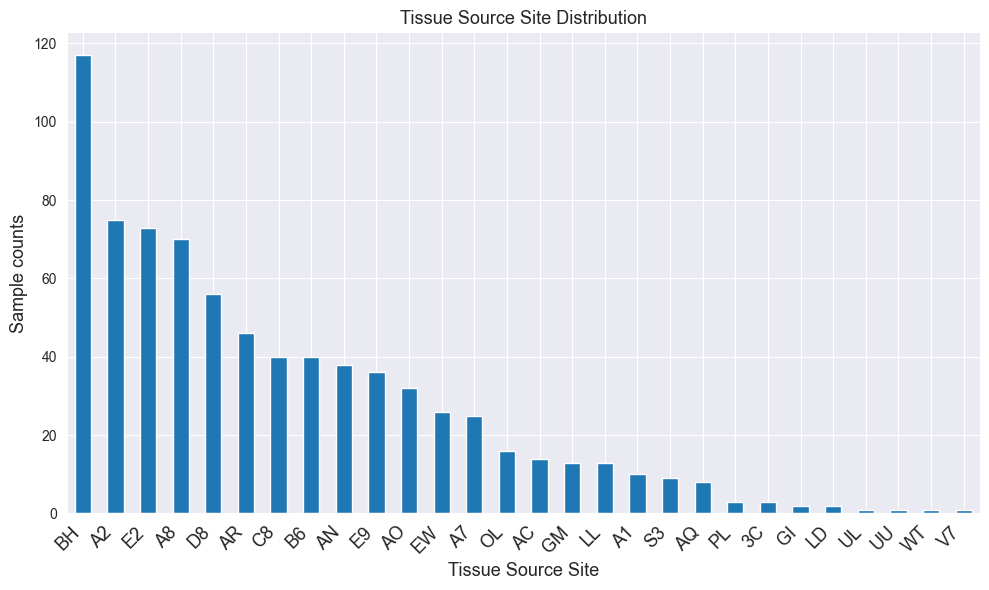

In [9]:
counts = clinical_df['tissue_source_site'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Tissue Source Site Distribution', fontsize=13)
plt.xlabel('Tissue Source Site', fontsize=13)
plt.ylabel('Sample counts', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.tight_layout()
plt.show()

### BCR codes

In [661]:
clinical_df[['bcr']].value_counts()


bcr                           
Nationwide Children's Hospital    771
Name: count, dtype: int64

So all rows have **BCR = NCH** (Nationwide Children's Hospital).

### Check days_to_death and vital_status consistency

In [662]:
clinical_df[(clinical_df['vital_status'] == 'Dead') & (clinical_df['days_to_death'].isna())]

,file,tissue_source_site,bcr,age_at_initial_pathologic_diagnosis,days_to_death,days_to_last_followup,vital_status,patient_barcode,pathologic_stage,radiation_therapy


So all deaths have a value for `days_to_death`.

In [663]:
clinical_df[(clinical_df['vital_status'] == 'Alive') & (clinical_df['days_to_death'].notna())]

,file,tissue_source_site,bcr,age_at_initial_pathologic_diagnosis,days_to_death,days_to_last_followup,vital_status,patient_barcode,pathologic_stage,radiation_therapy


We checked that no alive patient has a value for `days_to_death`.

### Check: patient represented more than once?

In [664]:
clinical_df[clinical_df['patient_barcode'].duplicated(keep=False)]

,file,tissue_source_site,bcr,age_at_initial_pathologic_diagnosis,days_to_death,days_to_last_followup,vital_status,patient_barcode,pathologic_stage,radiation_therapy


In [665]:
n_dup = clinical_df['patient_barcode'].duplicated().sum()
print(f"Found {n_dup} duplicated patient entries.")

Found 0 duplicated patient entries.


We can see that there are no duplicated patient entries, as each patient_barcode is unique.

# Plot Alive/Dead

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\2066552151.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


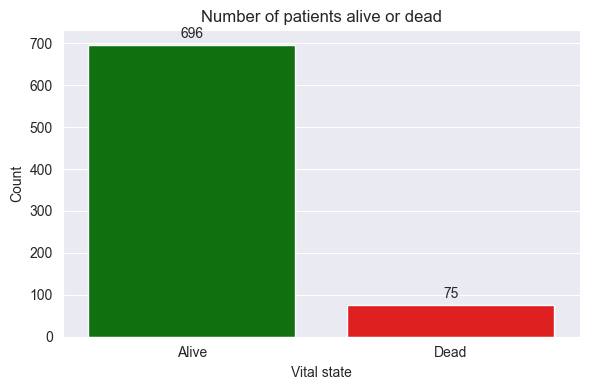

In [666]:
status_counts = clinical_df['vital_status'].value_counts().reset_index()
status_counts.columns = ['vital_status', 'count']

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=status_counts,
    x='vital_status',
    y='count',
    hue='vital_status',
    palette={'Alive': 'green', 'Dead': 'red'},
    dodge=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Number of patients alive or dead')
plt.ylabel('Count')
plt.xlabel('Vital state')
plt.legend().remove()
plt.tight_layout()
plt.show()

In [667]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']

clinical_df['age_group'] = pd.cut(clinical_df['age_at_initial_pathologic_diagnosis'], bins=bins, labels=labels, right=True)

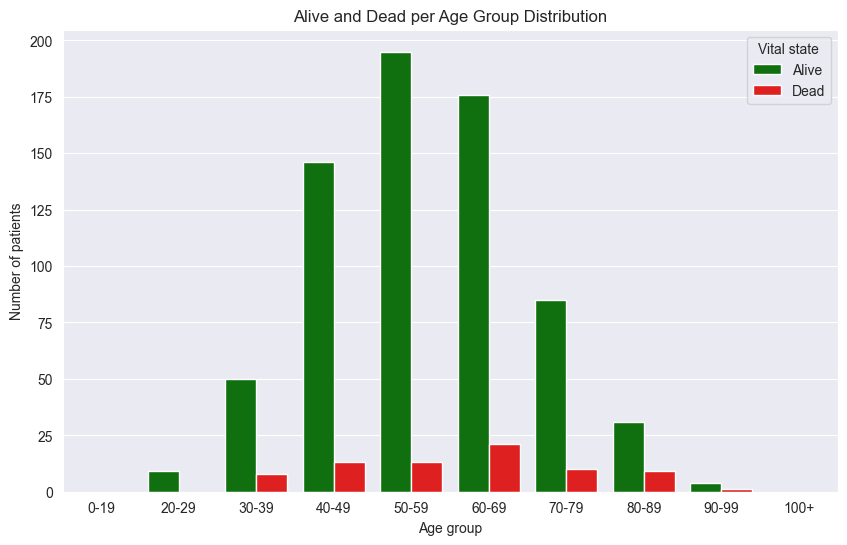

In [668]:
age_status_counts = clinical_df.groupby(['age_group', 'vital_status'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=age_status_counts, x='age_group', y='count', hue='vital_status', palette=['green','red'])
plt.title('Alive and Dead per Age Group Distribution')
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.legend(title='Vital state')
plt.show()

### Plot stage vs age

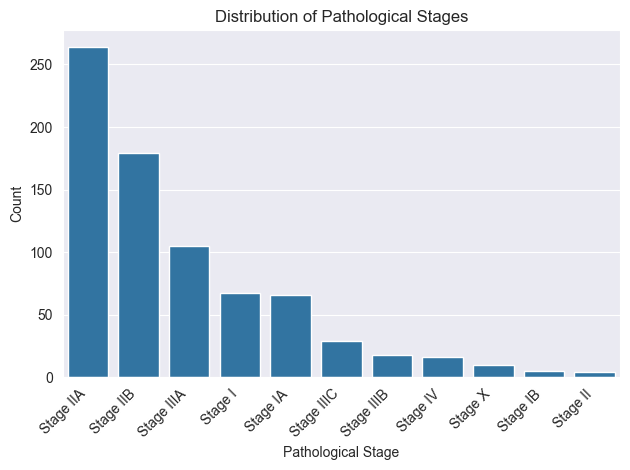

In [669]:
sns.countplot(
    x='pathologic_stage', 
    data=clinical_df, 
    order=clinical_df['pathologic_stage'].value_counts().index
)
plt.title("Distribution of Pathological Stages")
plt.xlabel("Pathological Stage")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plot stage vs survival

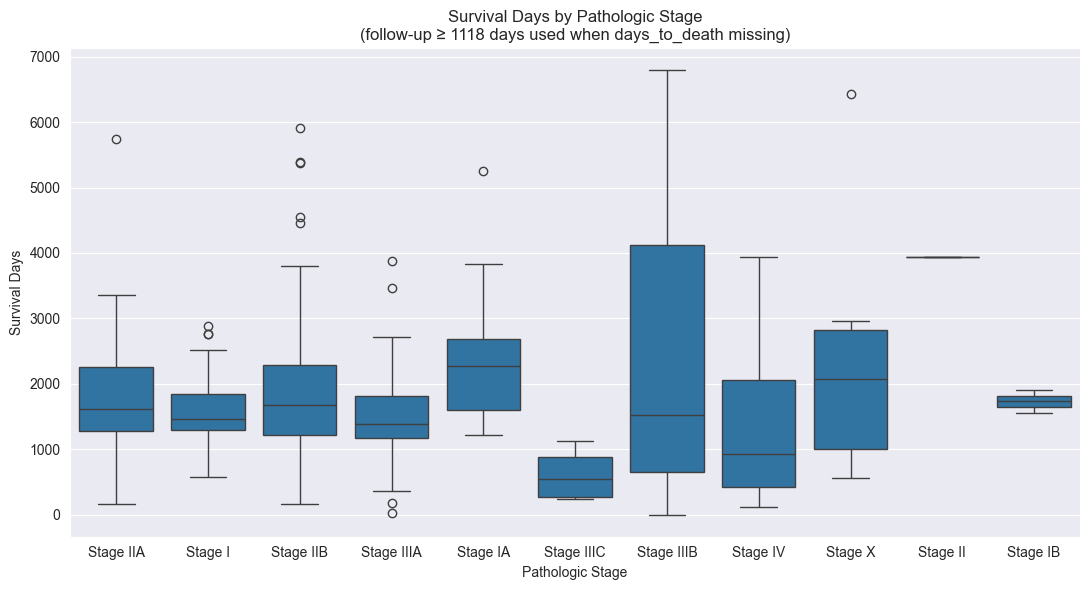

In [670]:
threshold = clinical_df['days_to_last_followup'].quantile(0.75)

clinical_df['survival_days'] = clinical_df['days_to_death']
mask = clinical_df['survival_days'].isna() & (clinical_df['days_to_last_followup'] >= threshold)
clinical_df.loc[mask, 'survival_days'] = clinical_df.loc[mask, 'days_to_last_followup']

plt.figure(figsize=(11,6))
sns.boxplot(x='pathologic_stage', y='survival_days', data=clinical_df)
plt.title(f'Survival Days by Pathologic Stage\n(follow-up ≥ {threshold:.0f} days used when days_to_death missing)')
plt.xlabel('Pathologic Stage')
plt.ylabel('Survival Days')
plt.xticks()
plt.tight_layout()
plt.show()

In [671]:
threshold = clinical_df['days_to_last_followup'].quantile(0.75)
threshold / 365

np.float64(3.0623287671232875)

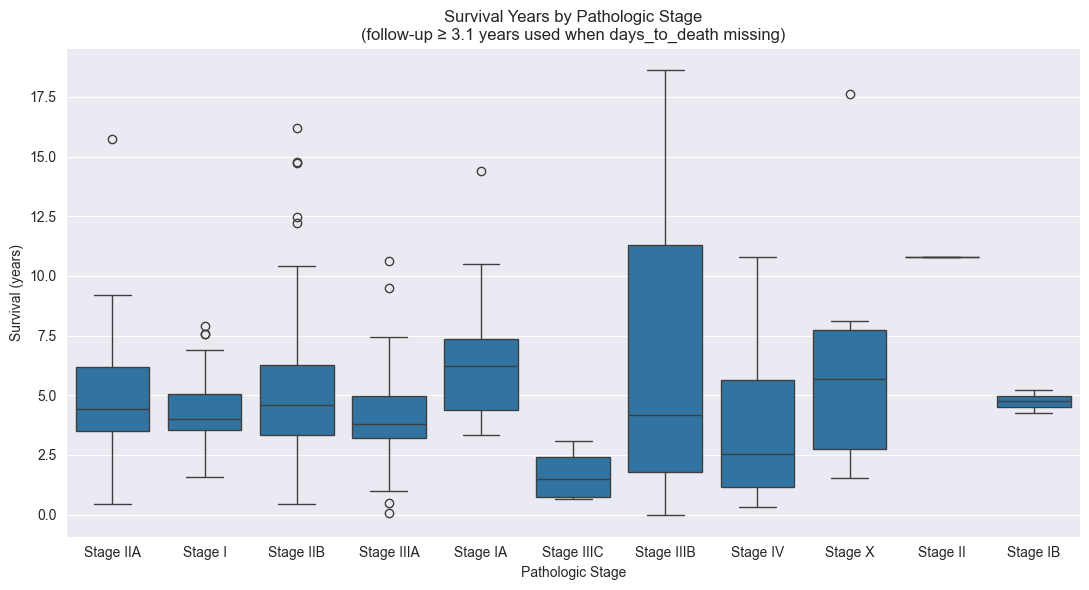

In [672]:
clinical_df['survival_days'] = clinical_df['days_to_death']
mask = clinical_df['survival_days'].isna() & (clinical_df['days_to_last_followup'] >= threshold)
clinical_df.loc[mask, 'survival_days'] = clinical_df.loc[mask, 'days_to_last_followup']

clinical_df['survival_years'] = clinical_df['survival_days'] / 365

plt.figure(figsize=(11,6))
sns.boxplot(x='pathologic_stage', y='survival_years', data=clinical_df)
plt.title(f'Survival Years by Pathologic Stage\n(follow-up ≥ {threshold/365:.1f} years used when days_to_death missing)')
plt.xlabel('Pathologic Stage')
plt.ylabel('Survival (years)')
plt.xticks()
plt.tight_layout()
plt.show()

## Followup Analysis

In [673]:
clinical_df[['days_to_last_followup']].describe()

,days_to_last_followup
count,696.000000
mean,739.989943
std,949.046203
min,0.000000
25%,118.000000
50%,394.000000
75%,1117.750000
max,6796.000000


### Create dataframe with folder name, file name, age_at_initial_pathologic_diagnosis, days_to_last_followup and days_to_death

In [674]:
count = clinical_df[clinical_df['days_to_last_followup'] >= 0]['days_to_last_followup'].count()
print(f"Number of patients with days_to_last_followup >= 0: {count}")

Number of patients with days_to_last_followup >= 0: 696


In [675]:
clinical_df.count()

file                                   771
tissue_source_site                     771
bcr                                    771
age_at_initial_pathologic_diagnosis    771
days_to_death                           75
days_to_last_followup                  696
vital_status                           771
patient_barcode                        771
pathologic_stage                       763
radiation_therapy                       83
age_group                              771
survival_days                          249
survival_years                         249
dtype: int64

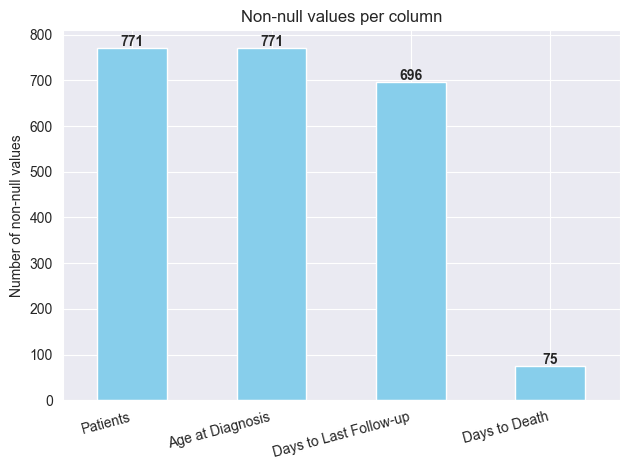

In [676]:
# Count of non-null values per column
counts = clinical_df[["file", "age_at_initial_pathologic_diagnosis", "days_to_last_followup", 'days_to_death']].count()

labels = [
    "Patients", 
    "Age at Diagnosis", 
    "Days to Last Follow-up", 
    "Days to Death"
]

ax = counts.plot(kind='bar', color='skyblue')
plt.title('Non-null values per column')
plt.ylabel('Number of non-null values')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=15, ha='right')

for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Plot on days_to_last_followup

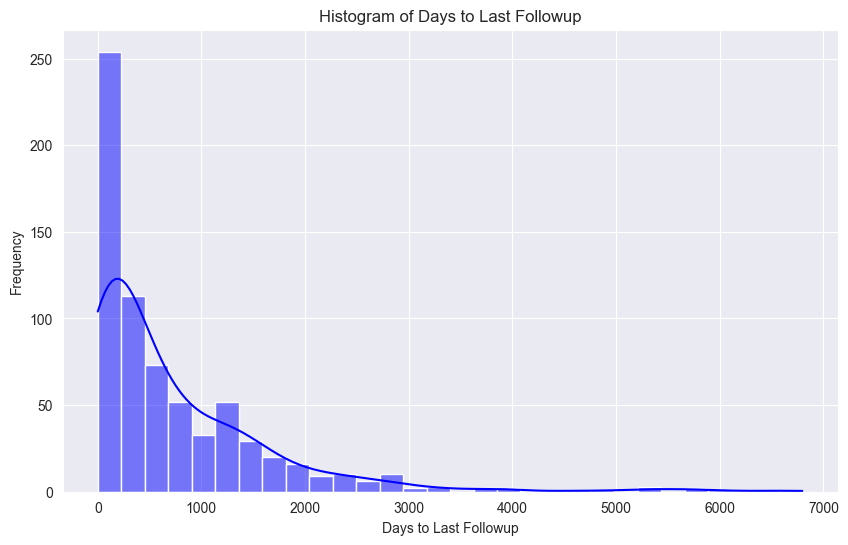

In [677]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clinical_df, x='days_to_last_followup', bins=30, kde=True, color='blue')
plt.title('Histogram of Days to Last Followup')
plt.xlabel('Days to Last Followup')
plt.ylabel('Frequency')
plt.show()

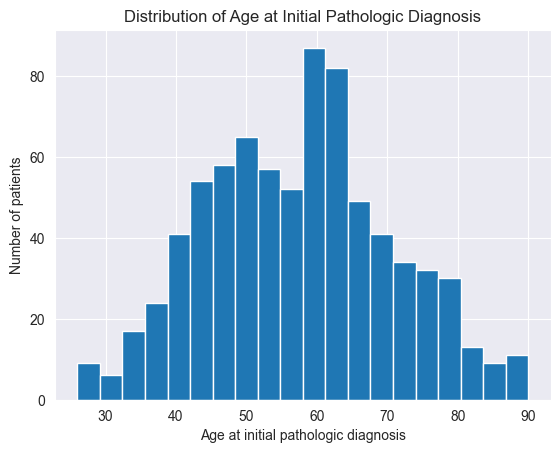

In [678]:
plt.hist(clinical_df['age_at_initial_pathologic_diagnosis'].dropna(), bins=20)
plt.xlabel('Age at initial pathologic diagnosis')
plt.ylabel('Number of patients')
plt.title('Distribution of Age at Initial Pathologic Diagnosis')
plt.show()

In [679]:
df1 = clinical_df[['age_at_initial_pathologic_diagnosis',
    'days_to_last_followup', 'days_to_death']].head(2)
df2 = clinical_df[clinical_df['days_to_death'] > 0][['age_at_initial_pathologic_diagnosis',
    'days_to_last_followup', 'days_to_death']].head(2)
pd.concat([df1, df2], ignore_index=True)

,age_at_initial_pathologic_diagnosis,days_to_last_followup,days_to_death
0,71,1918.0,NaN
1,53,1309.0,NaN
2,46,NaN,2763.0
3,50,NaN,4456.0


In [680]:
df = clinical_df
df['age_group'] = pd.cut(
    df['age_at_initial_pathologic_diagnosis'],
    bins=range(0, 100, 10),
    right=False,
    labels=[f"{i}-{i+9}" for i in range(0, 90, 10)]
)

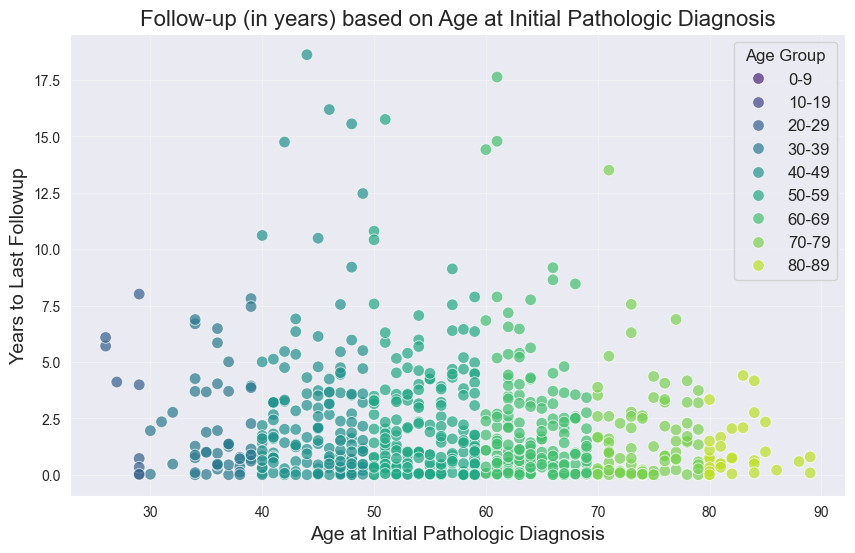

In [681]:
df['followup_years'] = df['days_to_last_followup'] / 365

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='age_at_initial_pathologic_diagnosis',
    y='followup_years',
    hue='age_group',
    palette='viridis',
    alpha=0.7,
    s=70
)
plt.title('Follow-up (in years) based on Age at Initial Pathologic Diagnosis', fontsize=16)
plt.xlabel('Age at Initial Pathologic Diagnosis', fontsize=14)
plt.ylabel('Years to Last Followup', fontsize=14)
plt.legend(title='Age Group', fontsize=12, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\1341895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


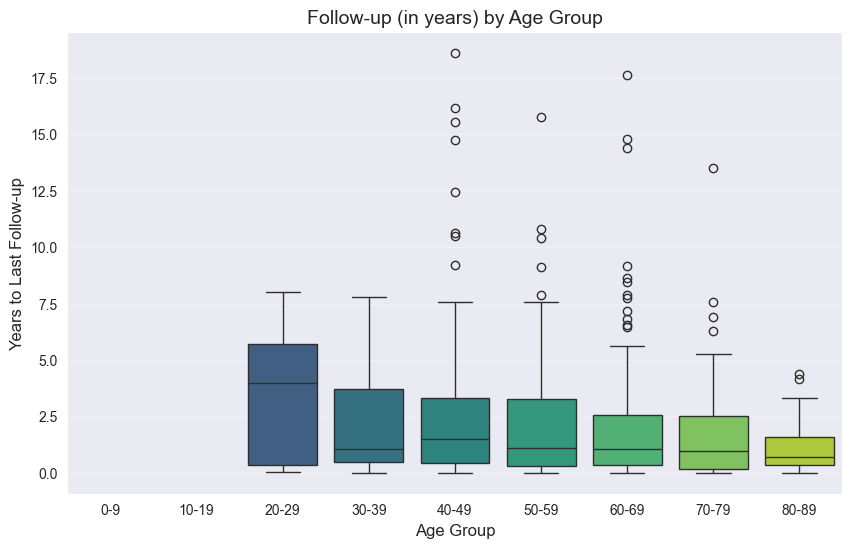

In [682]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='age_group',
    y='followup_years',
    palette='viridis'
)

plt.title('Follow-up (in years) by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Years to Last Follow-up', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## Radiation therapy analysis

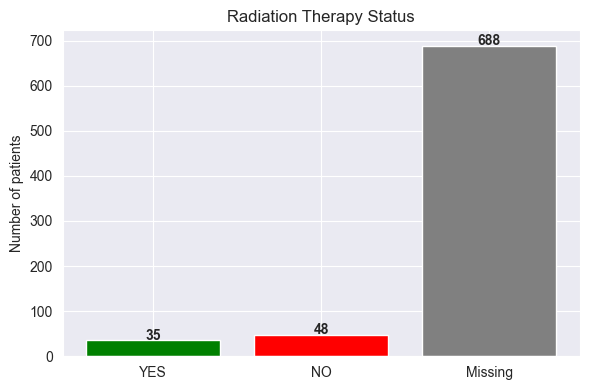

In [683]:
# Count values
na_count = clinical_df["radiation_therapy"].isna().sum()
yes_count = (clinical_df["radiation_therapy"] == "YES").sum()
no_count = (clinical_df["radiation_therapy"] == "NO").sum()

counts = [yes_count, no_count, na_count]
labels = ["YES", "NO", "Missing"]

# Plot
plt.figure(figsize=(6,4))
ax = plt.bar(labels, counts, color=['green', 'red', 'gray'])
plt.title('Radiation Therapy Status')
plt.ylabel('Number of patients')

# Add values on top of bars
for i, v in enumerate(counts):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

We can see that we have **688 None**, 35 Yes and 48 No values for `radiation_therapy`.

# Outliers analysis

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\549516005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})


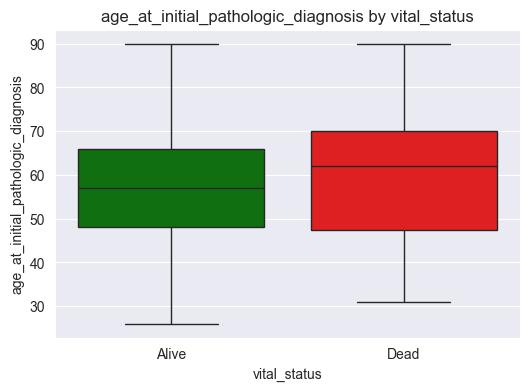

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\549516005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})


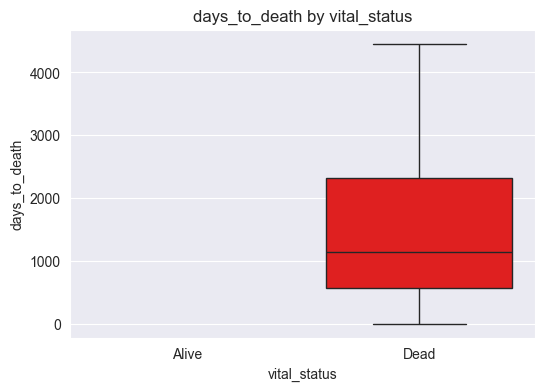

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\549516005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})


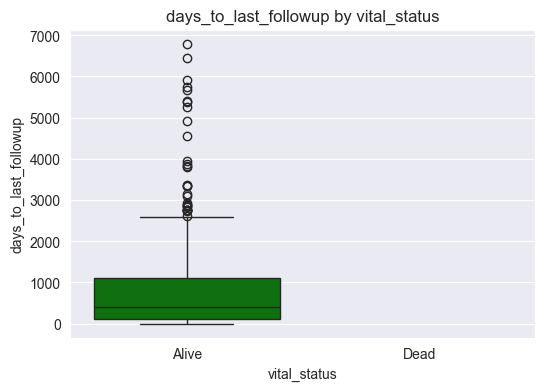

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\549516005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})


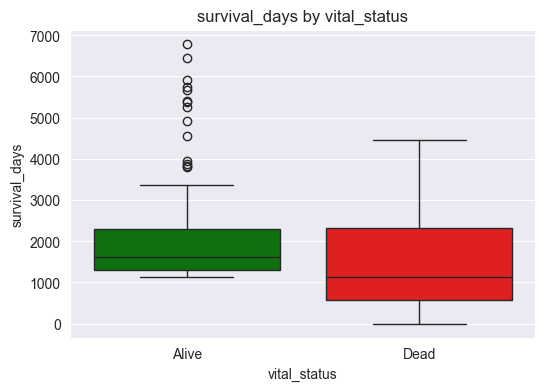

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\549516005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})


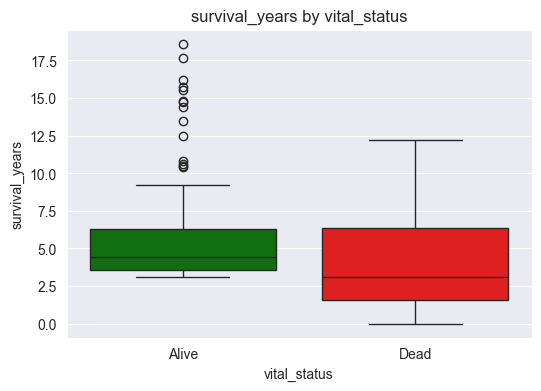

C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\549516005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})


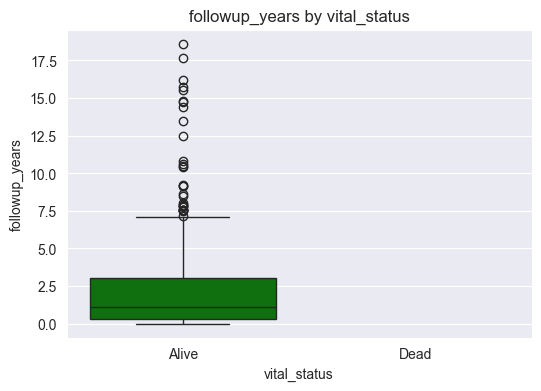

In [684]:
numeric_cols = clinical_df.select_dtypes(include='number')

for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='vital_status', y=col, data=clinical_df, palette={'Alive':'green','Dead':'red'})
    plt.title(f'{col} by vital_status')
    plt.show()


In [704]:
import pandas as pd
clinical_outliers_df = clinical_df.drop(columns=['file', 'bcr', 'patient_barcode', 'radiation_therapy', 'age_group', 'survival_days', 'survival_years', 'followup_years'])
# Seleziona solo le colonne numeriche
numeric_cols = clinical_outliers_df.select_dtypes(include='number')

# Calcola i limiti IQR per ogni colonna
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Maschera per identificare outlier
outlier_mask = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Estrai righe con almeno un outlier
outliers_df = clinical_df[outlier_mask.any(axis=1)].copy()

# Aggiungi una colonna che elenca le colonne dove ci sono outlier
outlier_cols_list = []
outlier_values_list = []

for idx, row_mask in outlier_mask[outlier_mask.any(axis=1)].iterrows():
    cols_out = list(row_mask[row_mask].index)
    vals_out = {col: numeric_cols.loc[idx, col] for col in cols_out}
    outlier_cols_list.append(cols_out)
    outlier_values_list.append(vals_out)

# Aggiungi le info al DataFrame
outliers_df['outlier_columns'] = outlier_cols_list
outliers_df['outlier_values'] = outlier_values_list

print(f"Numero di righe con outlier: {len(outliers_df)}")
display(outliers_df[['pathologic_stage', 'vital_status', 'outlier_columns', 'outlier_values'] + list(numeric_cols.columns)])


Numero di righe con outlier: 30


,pathologic_stage,vital_status,outlier_columns,outlier_values,age_at_initial_pathologic_diagnosis,days_to_death,days_to_last_followup
72,Stage IIB,Alive,[days_to_last_followup],{'days_to_last_followup': 5383.0},42,NaN,5383.0
139,Stage IA,Alive,[days_to_last_followup],{'days_to_last_followup': 3153.0},66,NaN,3153.0
151,Stage IIA,Alive,[days_to_last_followup],{'days_to_last_followup': 5749.0},51,NaN,5749.0
196,Stage IIB,Alive,[days_to_last_followup],{'days_to_last_followup': 5909.0},46,NaN,5909.0
234,None,Alive,[days_to_last_followup],{'days_to_last_followup': 5677.0},48,NaN,5677.0
251,Stage I,Alive,[days_to_last_followup],{'days_to_last_followup': 2876.0},59,NaN,2876.0
256,Stage IIA,Alive,[days_to_last_followup],{'days_to_last_followup': 3350.0},66,NaN,3350.0
275,Stage IIA,Alive,[days_to_last_followup],{'days_to_last_followup': 2850.0},39,NaN,2850.0
346,Stage IIIB,Alive,[days_to_last_followup],{'days_to_last_followup': 4929.0},71,NaN,4929.0
372,Stage IIA,Alive,[days_to_last_followup],{'days_to_last_followup': 2877.0},61,NaN,2877.0


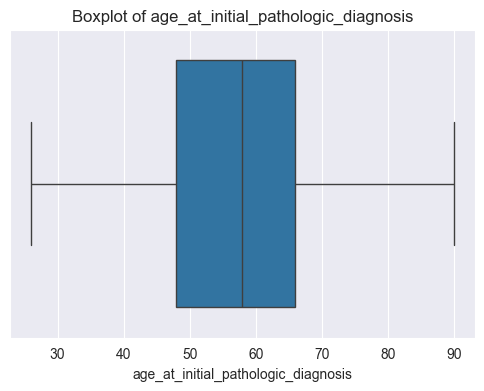

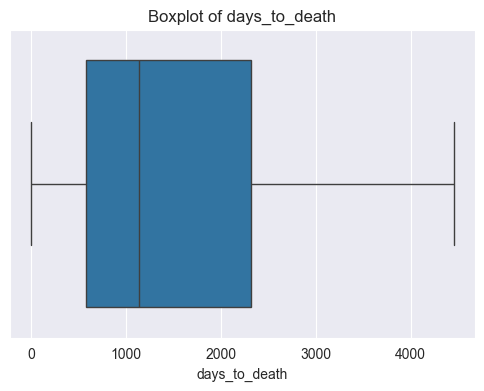

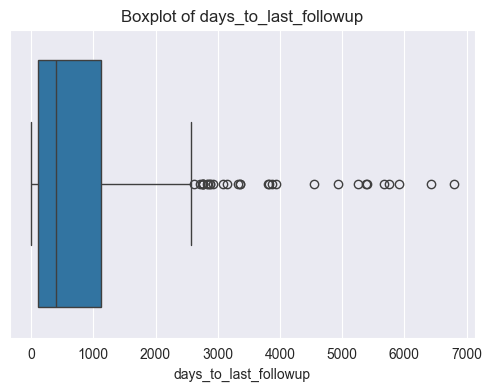

In [708]:
# Plot automatico per tutte le colonne numeriche
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_cols[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [705]:
from collections import Counter

# outlier_values è già una colonna di dizionari
outlier_dicts = outliers_df['outlier_values']

# Estrai tutte le chiavi (nomi delle colonne outlier)
all_outlier_cols = [key for d in outlier_dicts for key in d.keys()]

# Conta la frequenza
col_outlier_counts = Counter(all_outlier_cols)

# Trasforma in DataFrame ordinato
col_outlier_df = (
    pd.DataFrame(col_outlier_counts.items(), columns=['colonna', 'conteggio'])
    .sort_values(by='conteggio', ascending=False)
)

display(col_outlier_df)


,colonna,conteggio
0,days_to_last_followup,30


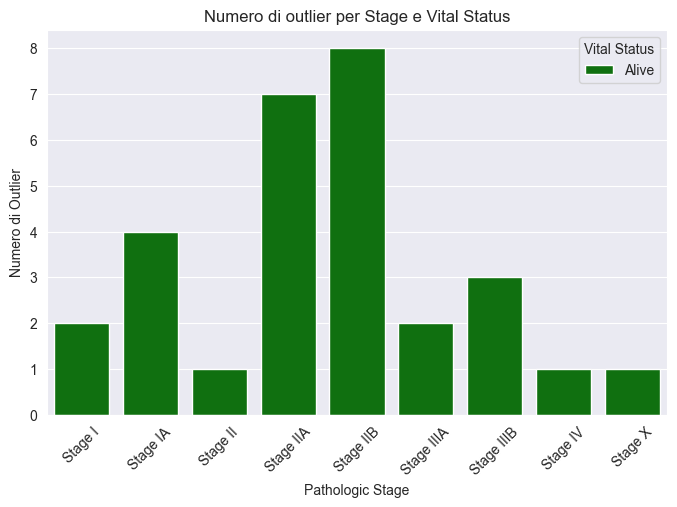

In [707]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conta quanti outlier per Stage e Vital Status
outlier_counts = outliers_df.groupby(['pathologic_stage', 'vital_status']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(data=outlier_counts, x='pathologic_stage', y='count', hue='vital_status', palette={'Alive':'green','Dead':'red'})
plt.title('Numero di outlier per Stage e Vital Status')
plt.xlabel('Pathologic Stage')
plt.ylabel('Numero di Outlier')
plt.legend(title='Vital Status')
plt.xticks(rotation=45)
plt.show()


In [689]:
import pandas as pd

numeric_cols = clinical_df.select_dtypes(include='number')
grouped = clinical_df.groupby('pathologic_stage')

outlier_summary = []

for stage, group in grouped:
    Q1 = group[numeric_cols.columns].quantile(0.25)
    Q3 = group[numeric_cols.columns].quantile(0.75)
    IQR = Q3 - Q1
    
    mask = (group[numeric_cols.columns] < (Q1 - 1.5 * IQR)) | (group[numeric_cols.columns] > (Q3 + 1.5 * IQR))
    rows_with_outlier = mask.any(axis=1).sum()
    total_rows = len(group)
    perc_outliers = (rows_with_outlier / total_rows * 100) if total_rows > 0 else 0
    
    # Per colonna, conta se c'è almeno un outlier
    cols_with_outlier = mask.any(axis=0)
    cols_list = list(cols_with_outlier[cols_with_outlier].index)
    
    outlier_summary.append({
        'pathologic_stage': stage,
        'total_rows': total_rows,
        'rows_with_outlier': int(rows_with_outlier),
        'perc_outliers': round(perc_outliers, 2),
        'columns_with_outliers': cols_list
    })

outlier_stage_df = pd.DataFrame(outlier_summary).sort_values('perc_outliers', ascending=False)
display(outlier_stage_df)


,pathologic_stage,total_rows,rows_with_outlier,perc_outliers,columns_with_outliers
3,Stage II,4,1,25.00,"[age_at_initial_pathologic_diagnosis, days_to_last_followup, followup_years]"
10,Stage X,10,2,20.00,"[age_at_initial_pathologic_diagnosis, days_to_last_followup, survival_days, survival_years, followup_years]"
2,Stage IB,5,1,20.00,[age_at_initial_pathologic_diagnosis]
9,Stage IV,16,3,18.75,"[age_at_initial_pathologic_diagnosis, days_to_death]"
7,Stage IIIB,18,3,16.67,"[days_to_last_followup, followup_years]"
1,Stage IA,66,9,13.64,"[days_to_last_followup, survival_days, survival_years, followup_years]"
4,Stage IIA,264,13,4.92,"[days_to_last_followup, survival_days, survival_years, followup_years]"
6,Stage IIIA,105,5,4.76,"[days_to_last_followup, survival_days, survival_years, followup_years]"
0,Stage I,67,3,4.48,"[days_to_last_followup, survival_days, survival_years, followup_years]"
5,Stage IIB,179,8,4.47,"[days_to_last_followup, survival_days, survival_years, followup_years]"


C:\Users\giorg\AppData\Local\Temp\ipykernel_10952\1747874175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


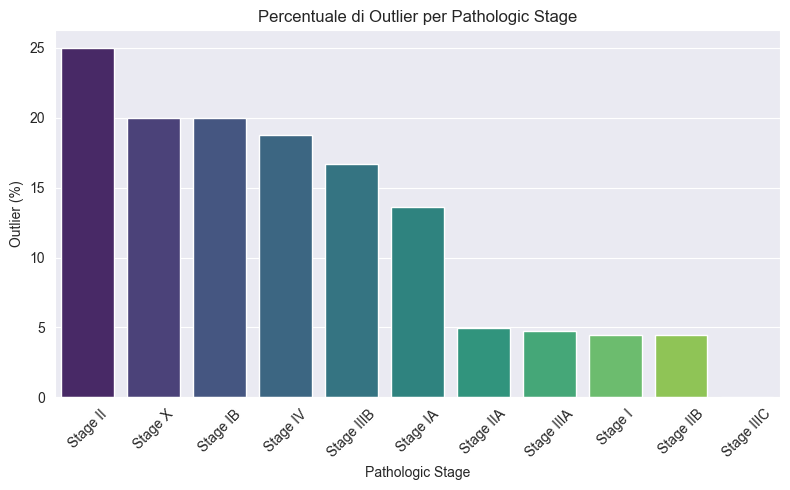

In [690]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    data=outlier_stage_df,
    x='pathologic_stage',
    y='perc_outliers',
    palette='viridis'
)
plt.title('Percentuale di Outlier per Pathologic Stage')
plt.xlabel('Pathologic Stage')
plt.ylabel('Outlier (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Clinical JSON

In [3]:
df_clinical_json = pd.read_json(CLINICAL_JSON_PATH)
print(f"Data cinical JSON shape: {df_clinical_json.shape}")
df_clinical_json.columns

Data cinical JSON shape: (827, 9)


Index(['data_format', 'cases', 'access', 'file_name', 'file_id', 'data_type',
       'data_category', 'file_size', 'annotations'],
      dtype='object')

In [4]:
print(f"Column 'data_category' unique values: {df_clinical_json['data_category'].unique()}")
print(f"Column 'data_format' unique values: {df_clinical_json['data_format'].unique()}")

Column 'data_category' unique values: ['Clinical']
Column 'data_format' unique values: ['BCR XML' 'BCR OMF XML' 'BCR Biotab']


In [5]:
print(df_clinical_json[['cases', 'file_name']].shape)
df_clinical_json[['cases', 'file_name']].head()

(827, 2)


,cases,file_name
0,[{'case_id': 'e4fc0909-f284-4471-866d-d8967b6a...,nationwidechildrens.org_clinical.TCGA-E2-A14P.xml
1,[{'case_id': '87281a89-91d2-44f7-9f80-668567ad...,nationwidechildrens.org_clinical.TCGA-EW-A1J6.xml
2,[{'case_id': 'b8a615f9-d19b-4b09-8ec8-0674e5c6...,nationwidechildrens.org_clinical.TCGA-C8-A12N.xml
3,[{'case_id': '3b01d064-8c00-4972-9f07-407eac8e...,nationwidechildrens.org_clinical.TCGA-BH-A0HX.xml
4,[{'case_id': '8785012f-f73e-4d68-87cf-1d804af3...,nationwidechildrens.org_clinical.TCGA-A7-A13D.xml


In [6]:
# The 'cases' column contains lists of dictionaries
cases_expanded = df_clinical_json['cases'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {})
unique_projects = pd.json_normalize(cases_expanded)['project.project_id'].unique()

print("Column 'cases' is a dict, with project IDs value:", unique_projects)

Column 'cases' is a dict, with project IDs value: ['TCGA-BRCA']


In [7]:
# Extract the 'case_id' value from the list of dictionaries in the 'cases' column
df_clinical_json['case_id'] = df_clinical_json['cases'].apply(
    lambda x: x[0]['case_id'] if isinstance(x, list) and len(x) > 0 and 'case_id' in x[0] else None
)

print(df_clinical_json[['case_id', 'file_name']].head())

                                case_id  \
0  e4fc0909-f284-4471-866d-d8967b6adcbc   
1  87281a89-91d2-44f7-9f80-668567ad5c72   
2  b8a615f9-d19b-4b09-8ec8-0674e5c648cd   
3  3b01d064-8c00-4972-9f07-407eac8e7534   
4  8785012f-f73e-4d68-87cf-1d804af32782   

                                           file_name  
0  nationwidechildrens.org_clinical.TCGA-E2-A14P.xml  
1  nationwidechildrens.org_clinical.TCGA-EW-A1J6.xml  
2  nationwidechildrens.org_clinical.TCGA-C8-A12N.xml  
3  nationwidechildrens.org_clinical.TCGA-BH-A0HX.xml  
4  nationwidechildrens.org_clinical.TCGA-A7-A13D.xml  
